<a href="https://colab.research.google.com/github/ShivanshuPurohit/Practice-models/blob/master/Dog_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Really easy impelementation of an image classifier in fastai library

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_97.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_260.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_69.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_16.jpg')]

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

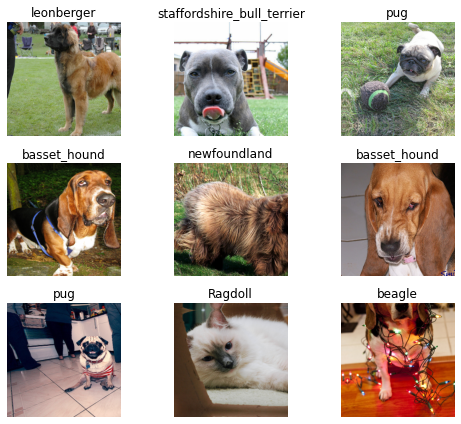

In [7]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))
print(data.classes)
len(data.classes),data.c

In [8]:
from fastai.metrics import error_rate
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.874389,0.290300,0.094723,00:47
1,0.488624,0.253012,0.079838,00:48
2,0.300134,0.193767,0.063599,00:48
3,0.201400,0.179439,0.054127,00:47


In [10]:
learn.save('dog-cat-classifier')
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

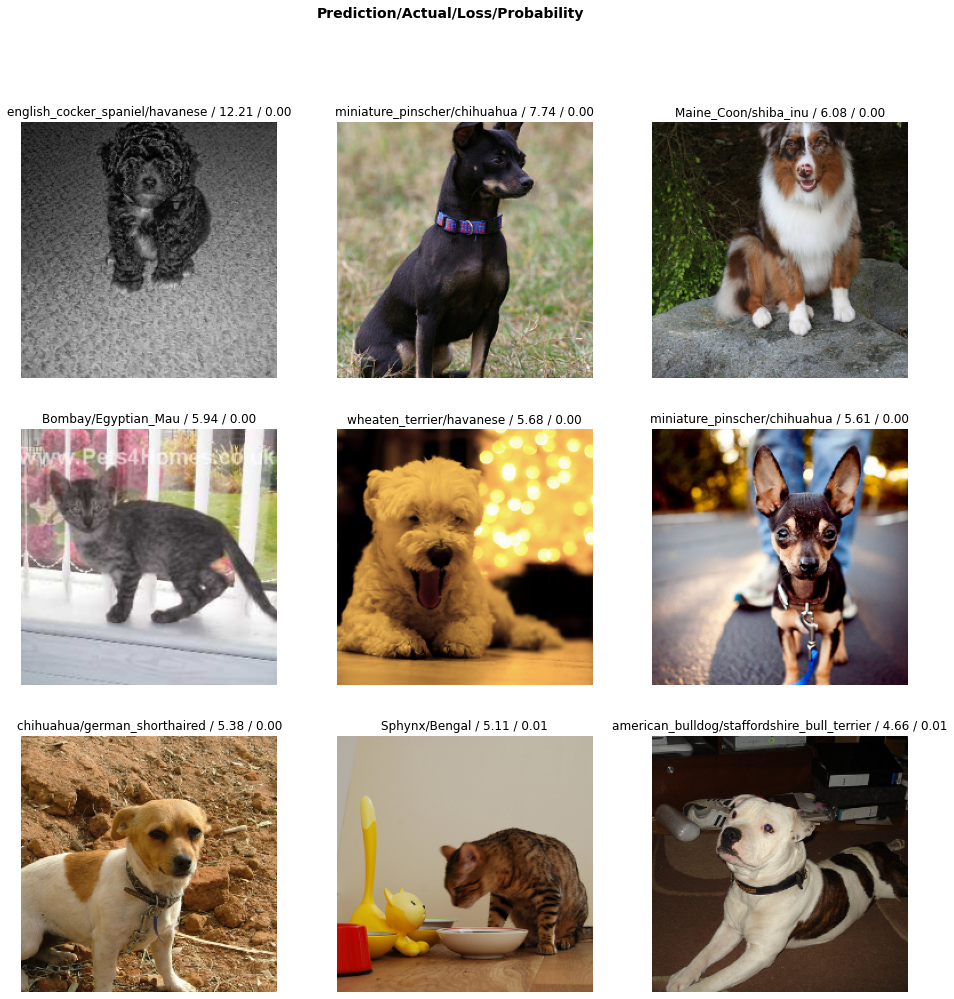

In [11]:
interp.plot_top_losses(9, figsize=(16,16))

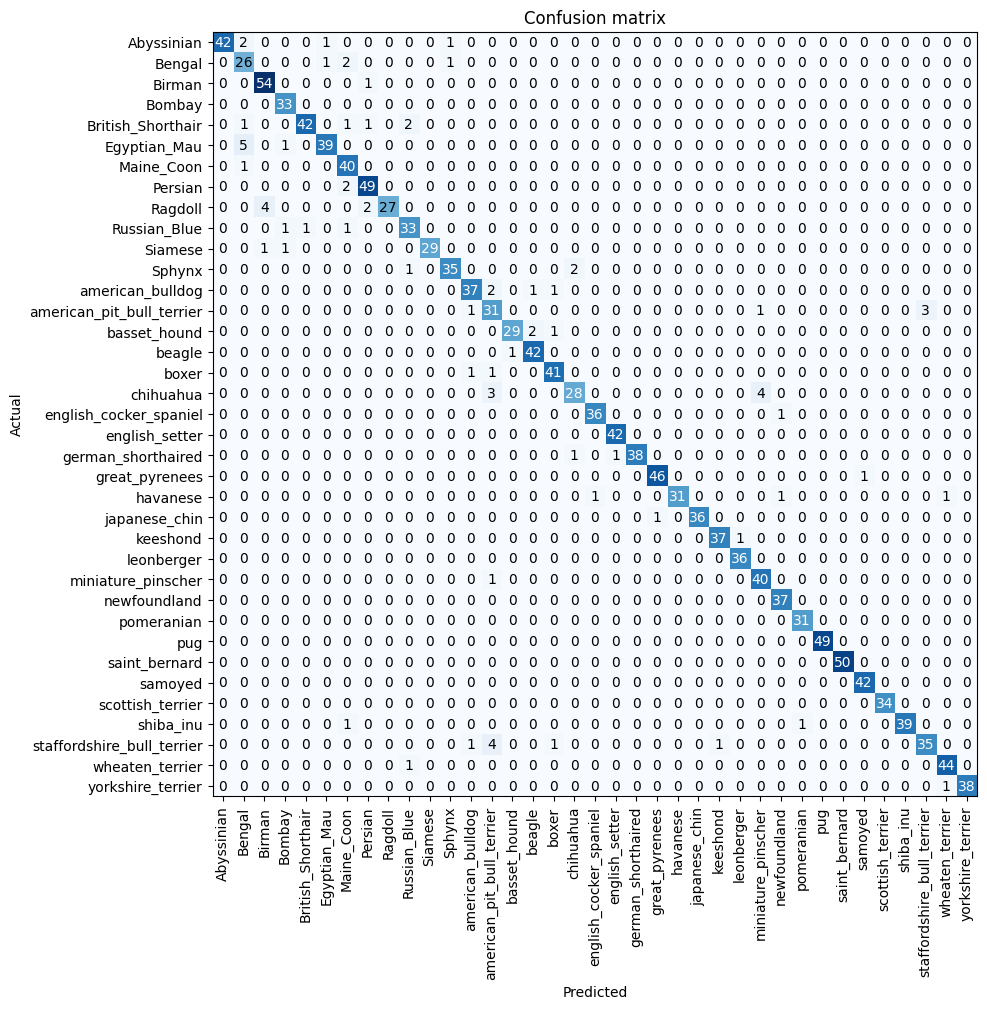

In [12]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)